# Laplace-Domain Analysis and Vibration Control in Flexible Robotic Arms

Lightweight robotic arms often vibrate due to flexibility in their links.  
We can model the vibration using the **1D damped wave equation** and analyze it with **Laplace Transforms** to design a simple **feedback controller** that suppresses vibration.

Mathematical topics combined:
- Partial Differential Equation (1D wave equation with damping)  
- Laplace Transform and Inverse Laplace Transform  
- Ordinary Differential Equation reduction  
- Control system (Laplace-domain PD controller)


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step


In [ ]:
# Define symbols
x, s, c, beta = sp.symbols('x s c beta', positive=True)
Y = sp.Function('Y')(x)

# Laplace-domain form of damped wave equation:
# c^2 * d2Y/dx2 - (s^2 + 2*beta*s)*Y = 0
eq = sp.Eq(c**2 * sp.diff(Y, x, 2) - (s**2 + 2*beta*s)*Y, 0)
eq


Eq(c**2*Derivative(Y(x), (x, 2)) - (2*beta*s + s**2)*Y(x), 0)

In [ ]:
sol = sp.dsolve(eq)
display(sol)


Eq(Y(x), C1*exp(-sqrt(s)*x*sqrt(2*beta + s)/c) + C2*exp(sqrt(s)*x*sqrt(2*beta + s)/c))

A, B, L = sp.symbols('A B L')
k = sp.sqrt((s**2 + 2*beta*s)/c**2)

# Boundary: y(0)=0 (fixed base) → A + B = 0
# Boundary: dy/dx(L)=0 (free end) → k*A*exp(kL) - k*B*exp(-kL)=0
eqs = [
    sp.Eq(A + B, 0),
    sp.Eq(k*A*sp.exp(k*L) - k*B*sp.exp(-k*L), 0)
]
sol_AB = sp.solve(eqs, (A, B))
sol_AB


In [ ]:
# Parameters
zeta = 0.2      # damping ratio
omega_n = 10.0  # natural frequency (rad/s)

num = [1.0]
den = [1.0, 2*zeta*omega_n, omega_n**2]
system_uncontrolled = lti(num, den)


In [ ]:
Kp = 50
Kd = 2

num_c = [Kd, Kp]
den_c = [1]

# Multiply controller * plant
num_closed = np.polymul(num_c, num)
den_closed = np.polyadd(np.polymul(den_c, den), np.polymul(num_c, num))

system_controlled = lti(num_closed, den_closed)


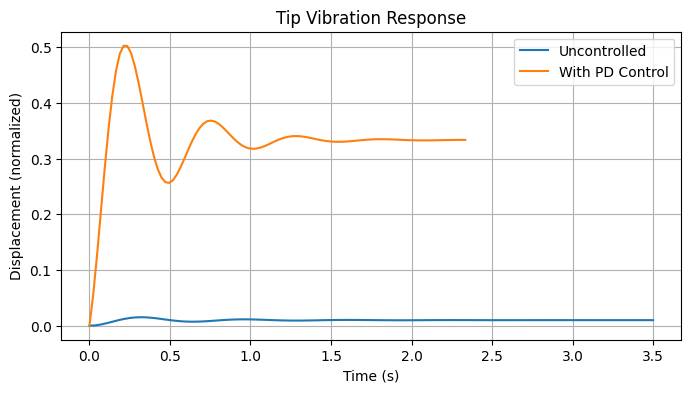

In [ ]:
t_un, y_un = step(system_uncontrolled)
t_c, y_c = step(system_controlled)

plt.figure(figsize=(8,4))
plt.plot(t_un, y_un, label='Uncontrolled')
plt.plot(t_c, y_c, label='With PD Control')
plt.title('Tip Vibration Response')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (normalized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Normalized Length')
ax.set_ylabel('Deflection')

x_vals = np.linspace(0, 1, 100)
y_wave = np.outer(np.sin(np.pi*x_vals), y_c[:200])

def update(frame):
    line.set_data(x_vals, y_wave[:, frame])
    return line,

ani = animation.FuncAnimation(fig, update, frames=y_wave.shape[1], interval=30)
plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())